In [1]:
# Importing libraries::

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_mnist=pd.read_csv("C:/Users/NADEEM/Downloads/train.csv")

In [3]:
df_mnist.shape

(42000, 785)

In [4]:
df_mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
columns=df_mnist.columns
features=columns.tolist()

In [6]:
Feature=features[1:]
Target=features[0]

In [7]:
Target

'label'

In [8]:
mnist_label=df_mnist[Target]
mnist_data=df_mnist[Feature]

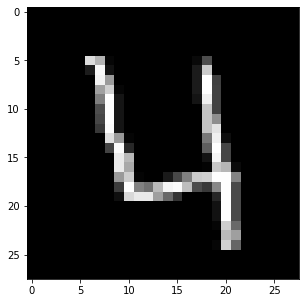

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sample_id=3

grid_data=mnist_data.iloc[sample_id].to_numpy().reshape(28,28)
plt.imshow(grid_data, cmap='gray')

plt.show()

In [10]:
mnist_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X=mnist_data.values
Y=mnist_label.values

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [13]:
#Standard Scaling

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [14]:
pca=PCA(n_components=784)
pca_data=pca.fit_transform(X_train)

In [15]:
percentage_var_explained=pca.explained_variance_ratio_ #it is a function which explains the variance ratio of all the principal components

In [16]:
percentage_var_explained

array([5.86328970e-02, 4.19021654e-02, 3.82405734e-02, 2.99745386e-02,
       2.60183808e-02, 2.27595792e-02, 1.99342158e-02, 1.77937100e-02,
       1.58529113e-02, 1.44632559e-02, 1.37446605e-02, 1.23721868e-02,
       1.16206070e-02, 1.12556774e-02, 1.06072001e-02, 1.03304597e-02,
       9.63314692e-03, 9.46341458e-03, 9.20417869e-03, 9.01219638e-03,
       8.47973603e-03, 8.29516477e-03, 7.90198234e-03, 7.60845904e-03,
       7.51179634e-03, 7.09578708e-03, 7.03427995e-03, 6.75912370e-03,
       6.50253738e-03, 6.36693802e-03, 6.22904066e-03, 6.08460230e-03,
       5.88317050e-03, 5.82660472e-03, 5.76488084e-03, 5.57289658e-03,
       5.43597212e-03, 5.33900233e-03, 5.20665419e-03, 4.96266511e-03,
       4.94431498e-03, 4.87716068e-03, 4.70035284e-03, 4.64874635e-03,
       4.59961064e-03, 4.55348331e-03, 4.51600822e-03, 4.40258234e-03,
       4.37043631e-03, 4.32754963e-03, 4.26441612e-03, 4.19421926e-03,
       4.15859189e-03, 4.06268551e-03, 4.02972730e-03, 3.95813701e-03,
      

In [17]:
cum_var_explained=np.cumsum(percentage_var_explained) # it gives cumulative frequency

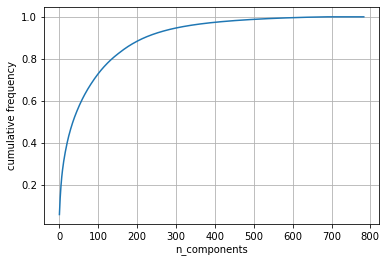

In [18]:
plt.plot(cum_var_explained)
plt.xlabel('n_components')
plt.ylabel('cumulative frequency')
plt.grid()

In [27]:
pca_data

exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)
for index,var in enumerate(exp_var_cumsum):  # adds counter 
    print('if n_components=%d,    variance=%f' %(index,np.round(var,3)))

if n_components=0,    variance=5.860000
if n_components=1,    variance=10.070000
if n_components=2,    variance=14.000000
if n_components=3,    variance=17.000000
if n_components=4,    variance=19.630000
if n_components=5,    variance=21.900000
if n_components=6,    variance=23.890000
if n_components=7,    variance=25.760000
if n_components=8,    variance=27.380000
if n_components=9,    variance=28.850000
if n_components=10,    variance=30.270000
if n_components=11,    variance=31.550000
if n_components=12,    variance=32.710000
if n_components=13,    variance=33.870000
if n_components=14,    variance=34.970000
if n_components=15,    variance=36.010000
if n_components=16,    variance=37.010000
if n_components=17,    variance=37.990000
if n_components=18,    variance=38.930000
if n_components=19,    variance=39.850000
if n_components=20,    variance=40.740000
if n_components=21,    variance=41.570000
if n_components=22,    variance=42.370000
if n_components=23,    variance=43.150000
if 

In [31]:
pca=PCA(n_components=0.90)
X=pca.fit_transform(X)

In [33]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.33,random_state=42)
# standardization is not much important here as the data here is already on same scale.

In [34]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(class_weight='balanced')

log.fit(X_train,Y_train)


LogisticRegression(class_weight='balanced')

In [35]:
Y_pred=log.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9097402597402597